In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import  f1_score, roc_auc_score, roc_curve

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 6

warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [ ]:
def generate_model_report(y_actual,y_predicted):
    print("Accuracy=", accuracy_score(y_actual,y_predicted))
    print("Perciion=", precision_score(y_actual,y_predicted))
    print("Recall=", recall_score(y_actual,y_predicted))
    print("F1 Score=", f1_score(y_actual,y_predicted))
    pass

In [ ]:
def generate_auc_roc_curve(clf,X_test):
    y_pred_proba= clf.predict_proba(X_test)[:, 1]
    fpr,tpr,thresholds =roc_curve(Y_test,y_pred_proba)
    auc= roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the Curve="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/card_transdata.csv')

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
target='fraud'


In [ ]:
X=df.loc[:, df.columns!=target]

In [ ]:
Y=df.loc[:, df.columns==target]

In [ ]:
X_train,X_test,Y_train, Y_test= train_test_split(X,Y,test_size=0.33, random_state=42)

0.0    912597
1.0     87403
Name: fraud, dtype: int64


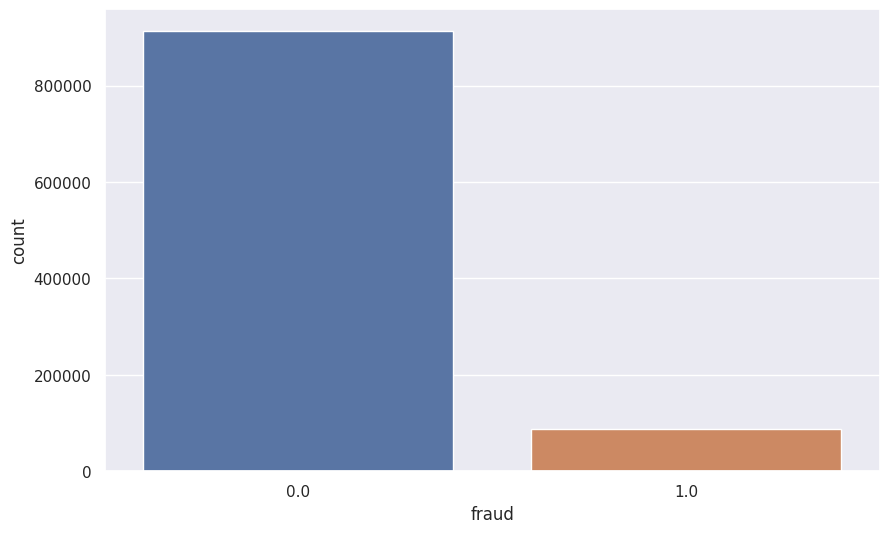

In [ ]:
ax=sns.countplot (x=target, data=df)
print(df[target].value_counts())

In [ ]:
100* (87403/float(df.shape[0]))

8.7403

In [ ]:
100* (912597/float(df.shape[0]))

91.2597

In [ ]:
Y_train[target].value_counts()

0.0    611385
1.0     58615
Name: fraud, dtype: int64

In [ ]:
clf=LogisticRegression().fit(X_train,Y_train)

In [ ]:
Y_Test_Pred=clf.predict(X_test)

In [ ]:
generate_model_report(Y_test,Y_Test_Pred)

Accuracy= 0.9582757575757576
Perciion= 0.8822212042551025
Recall= 0.6020911490898986
F1 Score= 0.7157221017858986


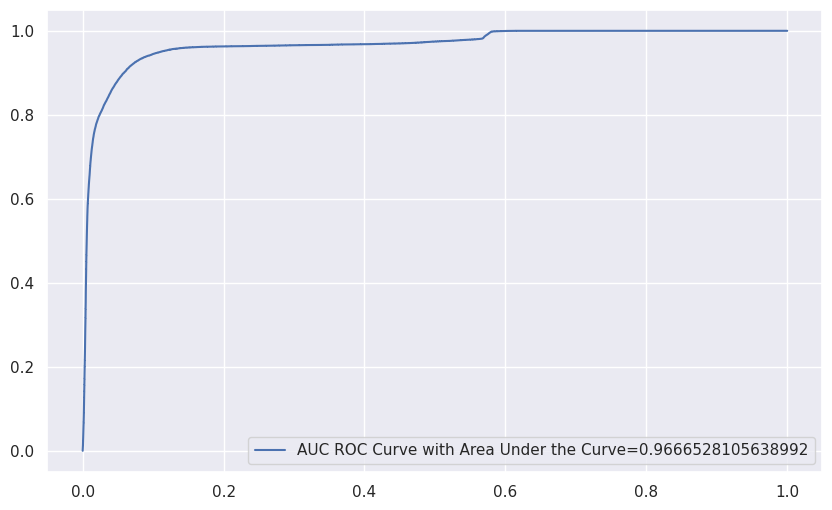

In [ ]:
generate_auc_roc_curve(clf,X_test)

In [ ]:
minority_class_len = len(df[df[target]==1])
print(minority_class_len)

87403


In [ ]:
majority_class_indices = df[df[target]==0].index
print(majority_class_indices)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            999990, 999991, 999992, 999993, 999994, 999995, 999996, 999997,
            999998, 999999],
           dtype='int64', length=912597)


In [ ]:
random_majority_indices=np.random.choice(majority_class_indices,minority_class_len,replace=False)
print(len(random_majority_indices))

87403


In [ ]:
minority_class_indices = df[df[target]==1].index
print(minority_class_indices)

Int64Index([    13,     24,     29,     35,     36,     47,     48,     54,
               101,    104,
            ...
            999874, 999875, 999883, 999892, 999902, 999908, 999916, 999919,
            999939, 999949],
           dtype='int64', length=87403)


In [ ]:
under_sample_indices= np.concatenate([minority_class_indices,random_majority_indices])

<Axes: xlabel='fraud', ylabel='count'>

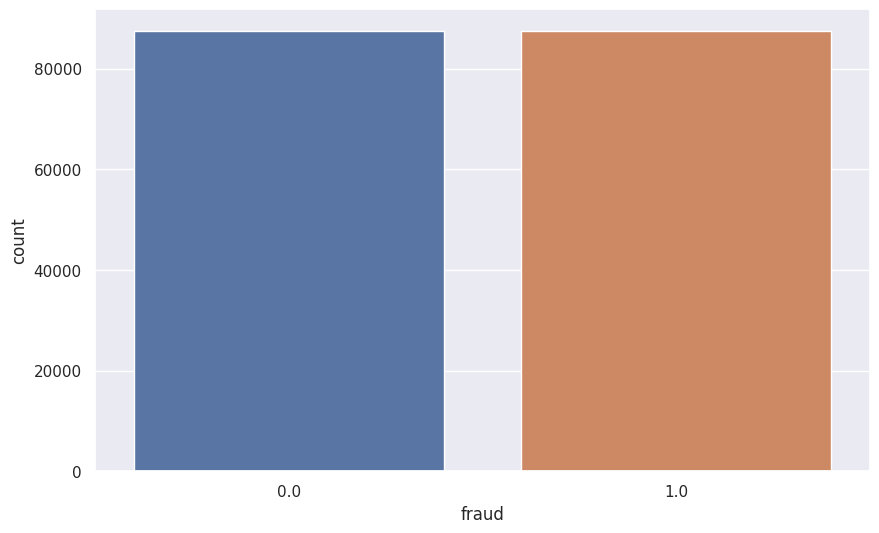

In [ ]:
under_sample=df.loc[under_sample_indices]
sns.countplot(x=target,data=under_sample)

In [ ]:
X=under_sample.loc[:,df.columns!=target]
Y=under_sample.loc[:,df.columns==target]
X_train,X_test,Y_train, Y_test= train_test_split(X,Y,test_size=0.33, random_state=42)
clf=LogisticRegression().fit(X_train,Y_train)
Y_Test_Pred=clf.predict(X_test)

In [ ]:
generate_model_report(Y_test,Y_Test_Pred)

Accuracy= 0.9425683874770309
Perciion= 0.9355861692695902
Recall= 0.9506600602889713
F1 Score= 0.9430628834619418


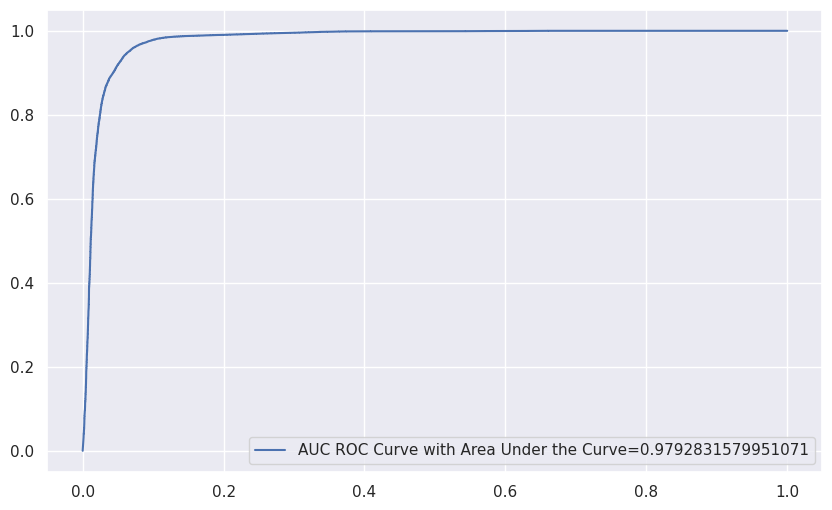

In [ ]:
generate_auc_roc_curve(clf,X_test)